Python Laboratory for Dislocation Dynamics (pyLabDD)

Simple 2D dislocation dynamics demonstration to relax a random dislocation configurations and then analyze their dynamics during shear testing. 

Author: Alexander Hartmaier
Institute: ICAMS / Ruhr-universität Bochum
Date: December 2021

This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC-BY-NC-SA)  Creative Commons License

Uses the libraries numpy (http://www.numpy.org/) and matplotlib (https://matplotlib.org/).# Dislocation Dynamics


## 1 Dislocations and stress fields

Provide functions to evaluate stress fields of edge dislocations according to

\begin{equation}
\sigma_{xx} = -\frac{\mu b_x}{2\pi (1-\nu)} \frac{y \left( 3x^2 + y^2 \right)}{\left(x^2 + y^2 \right)^2}
\end{equation}

\begin{equation}
\sigma_{yy} = \frac{\mu b_x}{2\pi (1-\nu)} \frac{y \left(x^2 - y^2 \right)}{\left(x^2 + y^2 \right)^2}
\end{equation}

\begin{equation}
\sigma_{xy} = \frac{\mu b_x}{2\pi (1-\nu)} \frac{x \left(x^2 - y^2 \right)}{\left(x^2 + y^2 \right)^2}
\end{equation}

Note that for the contributions of $b_y$ components of the Burgers verctors, $x$ and $y$ need to be exchanged in all above equations.

Read libraries and declare Python class 'Dislocations' in which all necessary variables and functions are defined and initialized.


In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from pylabdd import Dislocations


## 2 Initialize and relax dislocation configuration, perform dynamic shear test

Define material properties, simulation box and numerical parameters, total number of dislocation, number of mobile dislocations, number and inclination angle of slip planes. After this, the mobile dislocations are allowed to move to a position where the force on them is zero (relaxation step). This is followed by the dynamic shear testing for different dislocation densities and the analysis of the results.

### Note
Here the total dislocation density is varied by changing the size of the box and leaving the total number of dislocations constant. In order to achieve a constant density of mobile dislocations, the number of mobile dislocations is adapted according to the box size.


Configuration: 120 dislocations 80 mobile dislocations
box size: 200 micron x  200 micron
total dislocation density:  0.003 /micron^2
mobile dislocation density:  0.002 /micron^2


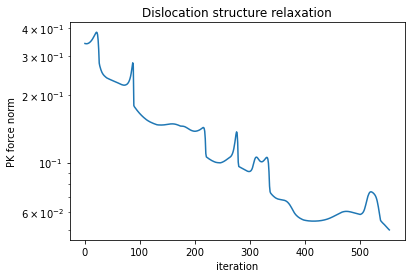

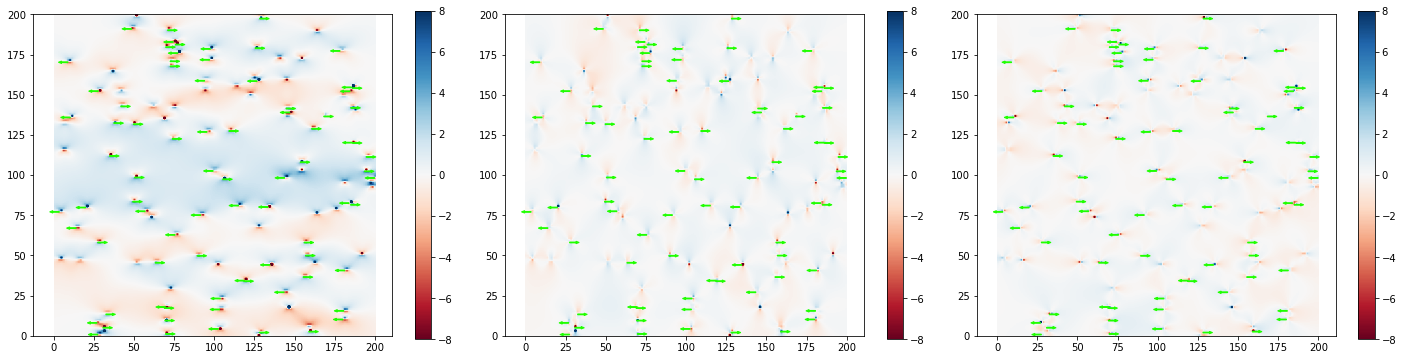

Relaxed dislocation configuration

Virtual dynamic tensile test with loading rate  1.0 /s
Performing 100000 iterations with initial time step 0.005

Iteration 	| stress 	| plastic strain 		| Time step 
---------------------------------------------------------------------------------
10000 		| 3.45182 	| 0.00036653808769116734 	| 0.0309


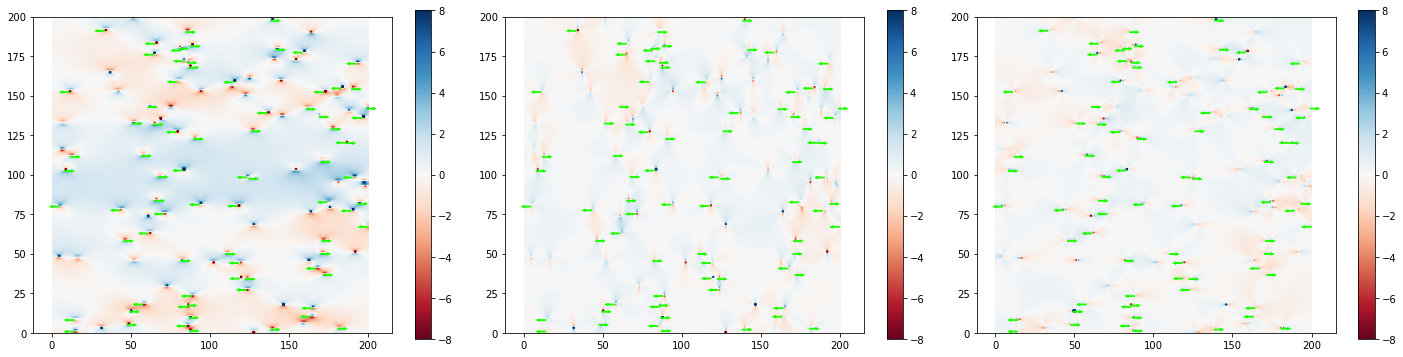

Configuration after 13214 iterations at total strain 0.0005000361262826283
Time step in last iteration:  0.03628221275112004


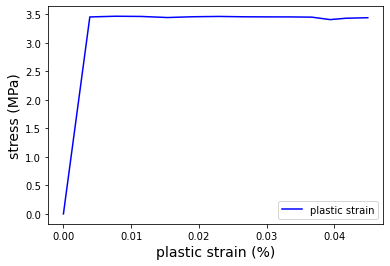


Configuration: 120 dislocations 45 mobile dislocations
box size: 150 micron x  150 micron
total dislocation density:  0.005333333333333333 /micron^2
mobile dislocation density:  0.002 /micron^2


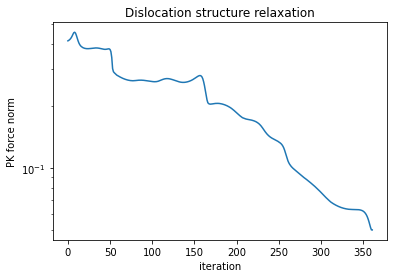

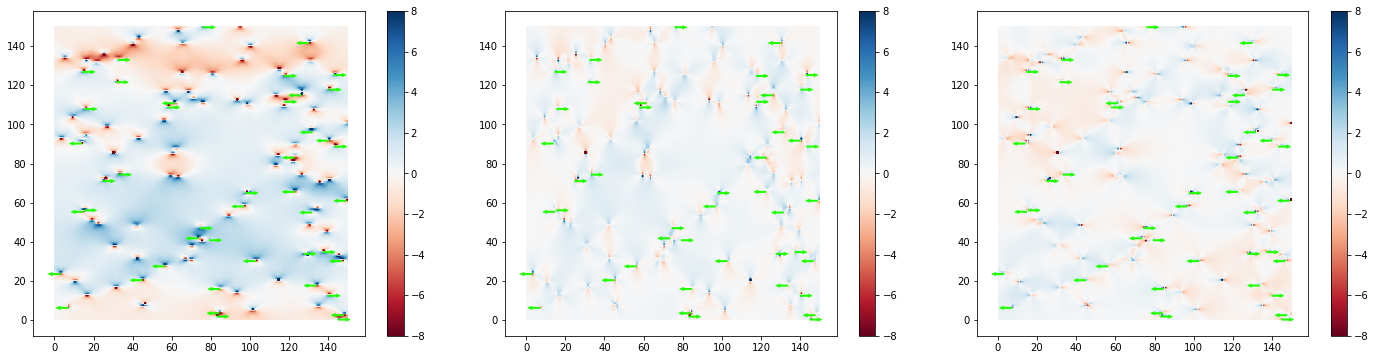

Relaxed dislocation configuration

Virtual dynamic tensile test with loading rate  1.0 /s
Performing 100000 iterations with initial time step 0.005

Iteration 	| stress 	| plastic strain 		| Time step 
---------------------------------------------------------------------------------
10000 		| 3.77501 	| 0.000180926816888494 	| 0.01594
20000 		| 3.7657 	| 0.00033806121543372984 	| 0.01434


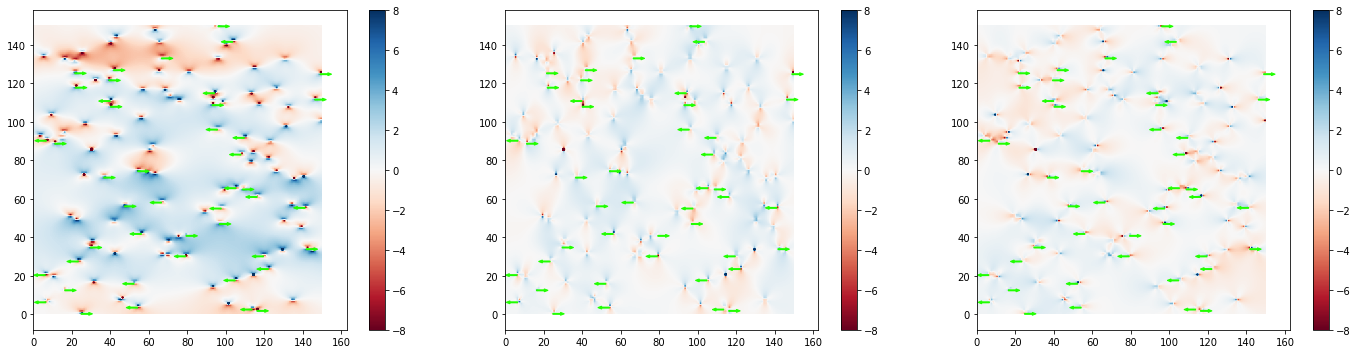

Configuration after 28366 iterations at total strain 0.0005000097594174982
Time step in last iteration:  0.015154423681298825


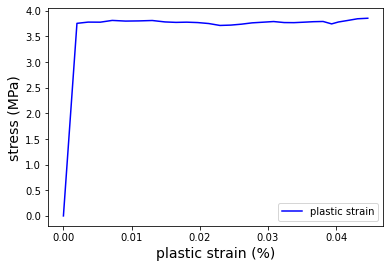


Configuration: 120 dislocations 20 mobile dislocations
box size: 100 micron x  100 micron
total dislocation density:  0.012 /micron^2
mobile dislocation density:  0.002 /micron^2


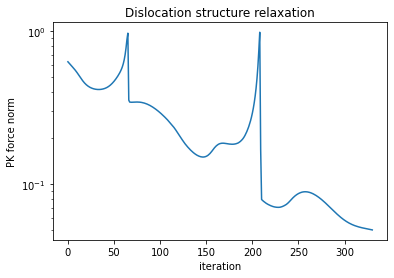

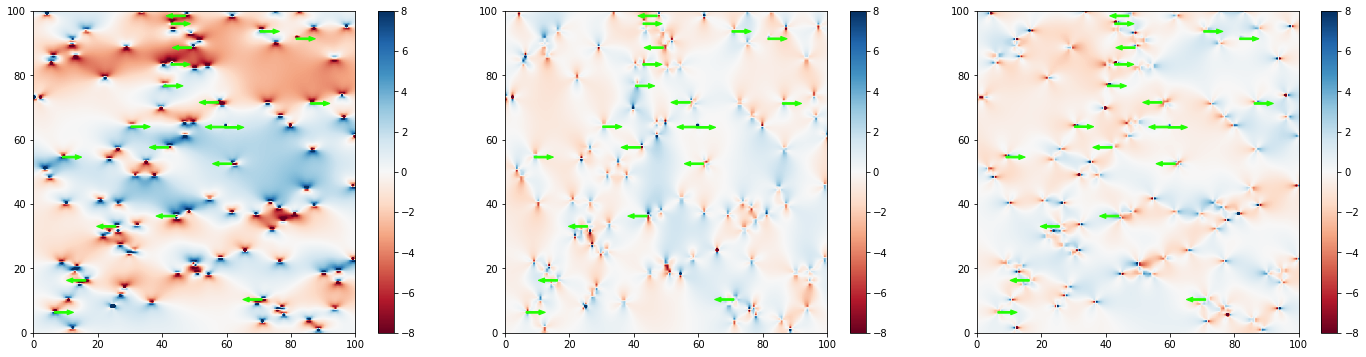

Relaxed dislocation configuration

Virtual dynamic tensile test with loading rate  1.0 /s
Performing 100000 iterations with initial time step 0.005

Iteration 	| stress 	| plastic strain 		| Time step 
---------------------------------------------------------------------------------
10000 		| 4.36783 	| 6.57457155428831e-05 	| 0.00624
20000 		| 4.32276 	| 0.0001307341206638644 	| 0.00646
30000 		| 4.24831 	| 0.00019624757622927898 	| 0.00646
40000 		| 4.52227 	| 0.0002601467172127925 	| 0.00649
50000 		| 4.64592 	| 0.00031083206491405534 	| 0.00593
60000 		| 4.60845 	| 0.00036221601496928097 	| 0.00471
70000 		| 4.72172 	| 0.00040914868446485303 	| 0.00502


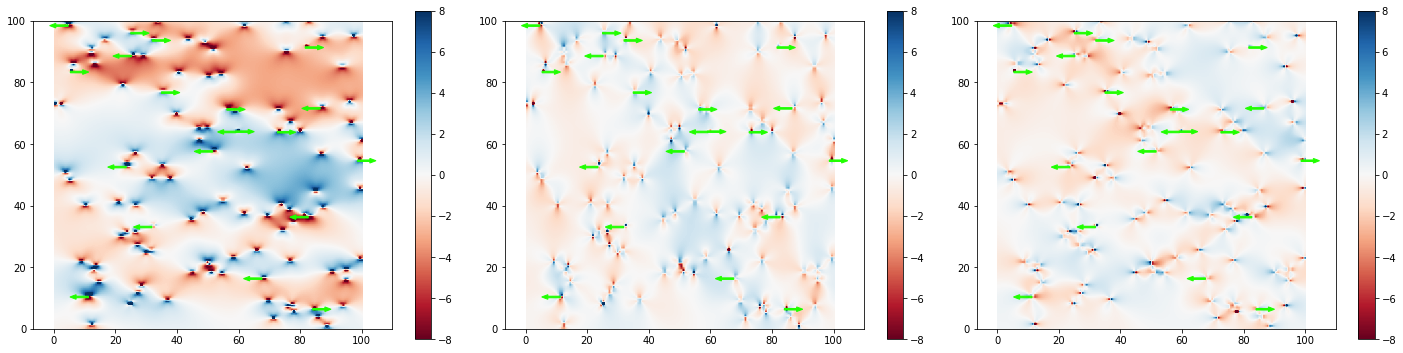

Configuration after 78655 iterations at total strain 0.0005000003384784134
Time step in last iteration:  0.005307964669887065


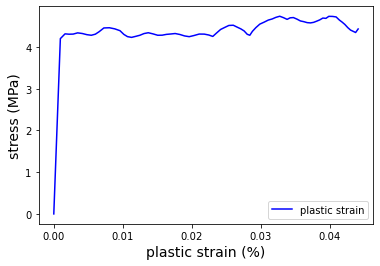


Configuration: 120 dislocations 5 mobile dislocations
box size: 50 micron x  50 micron
total dislocation density:  0.048 /micron^2
mobile dislocation density:  0.002 /micron^2


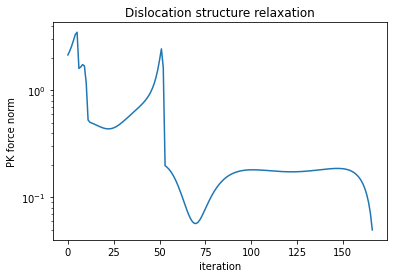

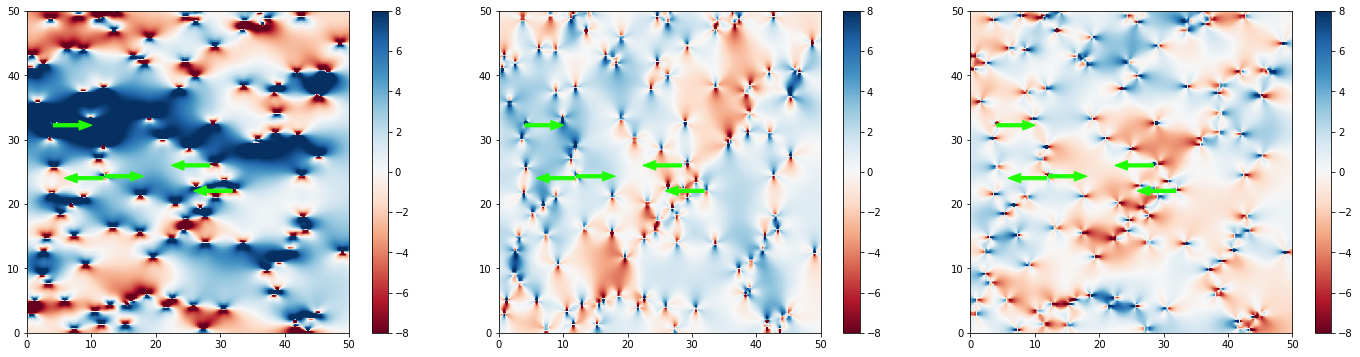

Relaxed dislocation configuration

Virtual dynamic tensile test with loading rate  1.0 /s
Performing 100000 iterations with initial time step 0.005

Iteration 	| stress 	| plastic strain 		| Time step 
---------------------------------------------------------------------------------
10000 		| 7.16287 	| 1.7269172722904264e-05 	| 0.00118
20000 		| 7.0015 	| 3.512239163586702e-05 	| 0.00222
30000 		| 7.50017 	| 5.112859037351348e-05 	| 0.00222
40000 		| 8.0686 	| 6.626291462530367e-05 	| 0.00222
50000 		| 8.38289 	| 8.311359803442873e-05 	| 0.0004
60000 		| 6.88864 	| 0.00010579104629613972 	| 0.0004
70000 		| 7.13778 	| 0.00011813936588194454 	| 0.00394
80000 		| 9.1513 	| 0.00013236993297409907 	| 0.00394
90000 		| 8.30354 	| 0.00014883515899487913 	| 0.0004
100000 		| 7.03371 	| 0.0001687071452112189 	| 0.0004


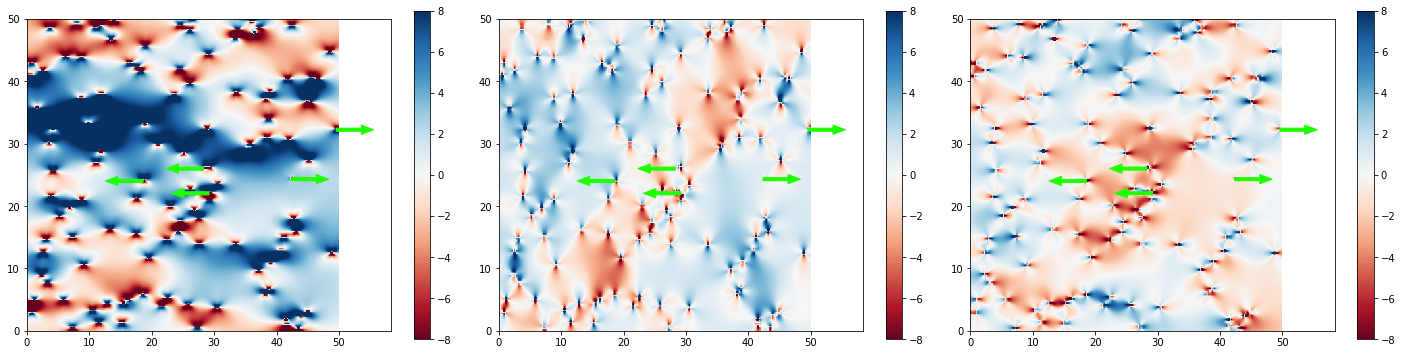

Configuration after 100000 iterations at total strain 0.0002566270576214158
Time step in last iteration:  0.0004


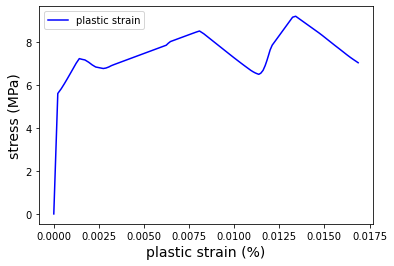

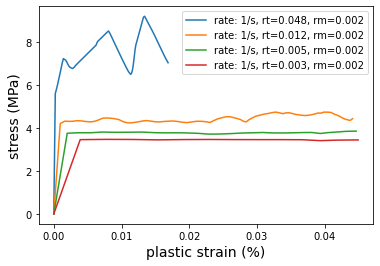

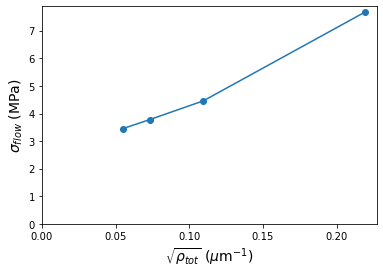

In [2]:
#define material parameters
#units: stress: MPa; length: micron; time: microseconds
mu = 80.0e3          # shear modulus
nu = 0.3             # Poisson ratio
b0 = 0.2e-3          # Burgers vector norm
C = mu*b0/(2*np.pi*(1.-nu))   # Constant for dislocation stress field
f0 = 10.             # initial slip resistance

moblaw = 'powerlaw'   # set mobility law used for dislocation motion: 'viscous' or 'powerlaw'
Ntot = 120
spang = 0.

#set strain parameters
edot = 1.e-6  # strain rate (per microsecond), vary between 1.e-8 and 1.e-5
efin = 0.0005   # final strain
nstep = 100000  # max number of steps (int(efin/(edot*dt*100.))*1000 )
idat = int(nstep/100) # frequency of data storage
ipl  = 10*idat # frequency of plotting
dt0 = 5.e-9/edot  #0.03    # values up to 0.05 yield similar results
dt = dt0

#box geometry
bc = 'pbc'            # set boundary conditions: 'fixed' or 'pbc'
dim = [200, 150, 100, 50] # dimensions of squre-shaped simulation boxes to be used

#initialze random number generator
np.random.seed(110)  # seed RNG
rt_rho = []
sy = []
eps = []
sig = []
label = []

for i, hd in enumerate(dim):
    #define dislocations
    Nmob = int(2.e-3*dim[i]**2)  # keep density of mobile dislocations constant
    dsl = Dislocations(Ntot, Nmob, spang, C, b0, 
                       LX=dim[i], LY=dim[i], bc=bc, f0=f0) 
    dsl.positions(stol=1.e-3)   # initialize positions randomly
    print('\n===============================================================')
    print('Configuration:', dsl.Ntot,'dislocations', dsl.Nmob,'mobile dislocations')
    print('box size:',dsl.lx,'micron x ',dsl.ly,'micron')
    print('total dislocation density: ',dsl.rho,'/micron^2')
    print('mobile dislocation density: ',dsl.rho_m,'/micron^2')

    dsl.relax_disl()  # relax dislocations into force equilibrium
    dsl.plot_stress()
    print('Relaxed dislocation configuration\n')
    print('Virtual dynamic tensile test with loading rate ',edot*1e6,'/s')
    print('Performing',nstep,'iterations with initial time step', dt0)
    print('\nIteration \t| stress \t| plastic strain \t\t| Time step ')
    print('---------------------------------------------------------------------------------')
    #initialize variables
    tau0 = 0.     # macro shear stress
    epl  = 0.     # plastic strain
    etot = 0.     # total strain
    sig_m = [0.]   # initialize list for stress values for postprocessing 
    epl_m = [0.]
    eps_m = [0.]
    ic = 0
    Cpl = dsl.rho_m*b0  # prefactor for Orowan law
    # start main loop
    while etot<efin and ic<nstep:
        etot +=edot*dt
        tau0 = mu*(etot-epl)
        fsp, dt = dsl.move_disl(tau0, Nmob, moblaw, dt)
        #calculate plastic slip
        dgpl = Cpl*(np.dot(dsl.dx,dsl.bx) + np.dot(dsl.dy,dsl.by))
        epl += dgpl
        if epl>etot:
            print('Warning: check time step', ic, dgpl, tau0, epl, etot, f0)
        ic += 1
        if ic%idat==0:
            sig_m.append(tau0)
            eps_m.append(etot)
            epl_m.append(epl)
            if ic%ipl==0:
                #dsl.plot_stress()
                print(ic,'\t\t|', tau0.round(5),'\t|',epl,'\t|',dt.round(5))
    dsl.plot_stress() 
    print('Configuration after',ic,'iterations at total strain',etot)
    print('Time step in last iteration: ',dt) 
    
    epl_m = np.array(epl_m)
    sig_m = np.array(sig_m)
    eps_m = np.array(eps_m)
    plt.plot(epl_m*100,sig_m,'b',label='plastic strain')
    plt.xlabel('plastic strain (%)',fontsize=14)
    plt.ylabel('stress (MPa)',fontsize=14)
    plt.legend()
    plt.show()
    
    eps.append(epl_m)
    sig.append(sig_m)
    rt_rho.append(np.sqrt(dsl.rho))
    i0 = int(len(sig_m)*0.1)
    sy.append(np.average(sig_m[i0:]))
    label.append('rate: 1/s, rt='+format(dsl.rho,'.3f')+', rm='+format(dsl.rho_m,'.3f'))

#plot stress strain curves
for i in range(len(dim)-1,-1,-1):
    plt.plot(eps[i]*100,sig[i],label=label[i])
plt.xlabel('plastic strain (%)',fontsize=14)
plt.ylabel('stress (MPa)',fontsize=14)
plt.legend()
plt.show()

#plot flow stress again sqrt of total disl. density
plt.plot(rt_rho,sy,'-o')
plt.xlim(left=0.)
plt.ylim(bottom=0.)
plt.xlabel(r'$\sqrt{\rho_{tot}}$ ($\mu$m$^{-1}$)',fontsize=14)
plt.ylabel(r'$\sigma_{flow}$ (MPa)',fontsize=14)
plt.show()


It is seen that the Taylor law is fulfilled in the sense that the flow stress, i.e. the stress level at which the material follows the applied strain rate, increases proportionally to the square root of the total dislocation density. It is also seen that the internal stresses are higher for higher dislocation densities such that the mobile dislocations need to overcome higher barriers.

## 3 Virtual shear testing with varying number of dislocations

In this part the dislocation configuration is created in a similar way as before. However, the variation of the dislocation density is achieved by varying the total number of dislocations is a box of constant size. The number of mobile dislocations is kept constant such that the same density of mobile dislocations is achieved as above. Note, that in this way the effort to reach higher dislocation densities growth overproportionally because the number of calculations is $N_\mathrm{mob} N_\mathrm{tot}$.



Configuration: 10 dislocations 10 mobile dislocations
box size: 70.71 micron x  70.71 micron
total dislocation density:  0.0020000383607357594 /micron^2
mobile dislocation density:  0.0020000383607357594 /micron^2


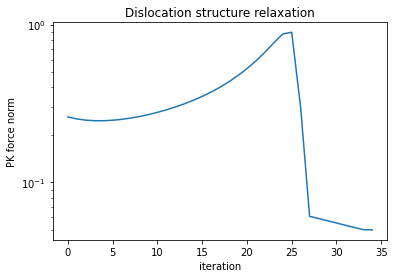

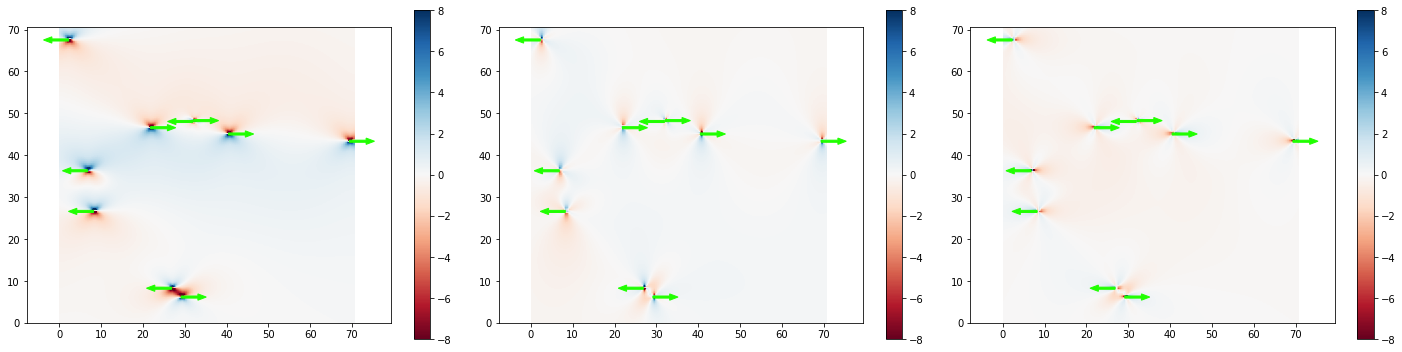

Relaxed dislocation configuration

Virtual dynamic tensile test with loading rate  1.0 /s
Performing 100000 iterations with initial time step 0.005

Iteration 	| stress 	| plastic strain 		| Time step 
---------------------------------------------------------------------------------
10000 		| 4.693 	| 5.4899071631638044e-05 	| 0.00573
20000 		| 4.61266 	| 0.000113167707596812 	| 0.00573
30000 		| 4.54083 	| 0.00017397038072370174 	| 0.0063
40000 		| 4.47902 	| 0.00023773340483816983 	| 0.0063
50000 		| 4.67489 	| 0.00029796872939112895 	| 0.00599
60000 		| 4.58932 	| 0.00035378801538717494 	| 0.00437
70000 		| 4.5714 	| 0.00041245163869080406 	| 0.00639


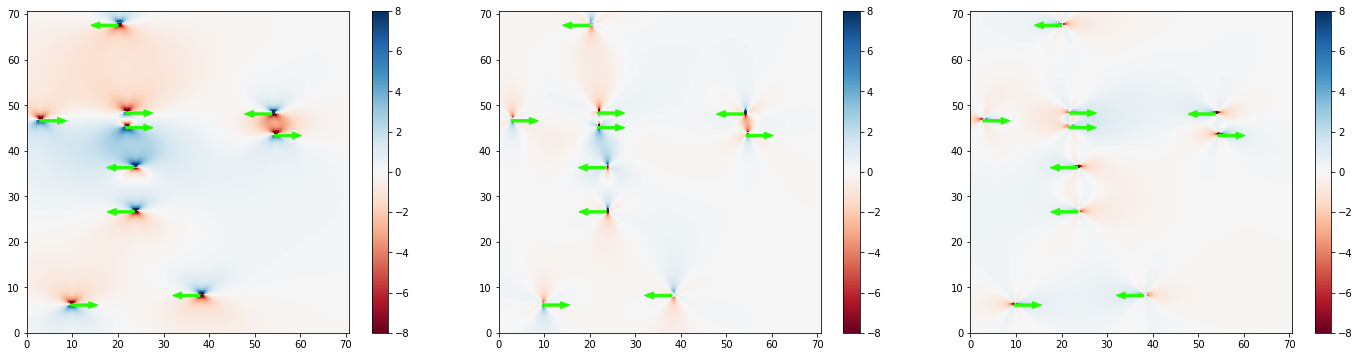

Configuration after 74757 iterations at total strain 0.0005000024124063122
Time step in last iteration:  0.006393665179869829


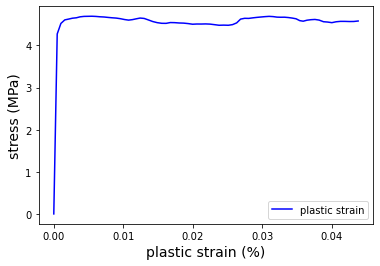


Configuration: 25 dislocations 10 mobile dislocations
box size: 70.71 micron x  70.71 micron
total dislocation density:  0.005000095901839399 /micron^2
mobile dislocation density:  0.0020000383607357594 /micron^2


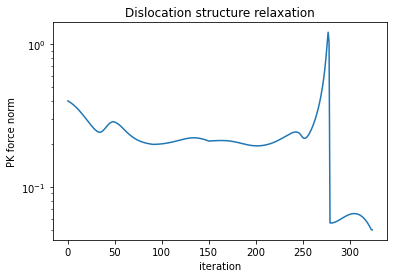

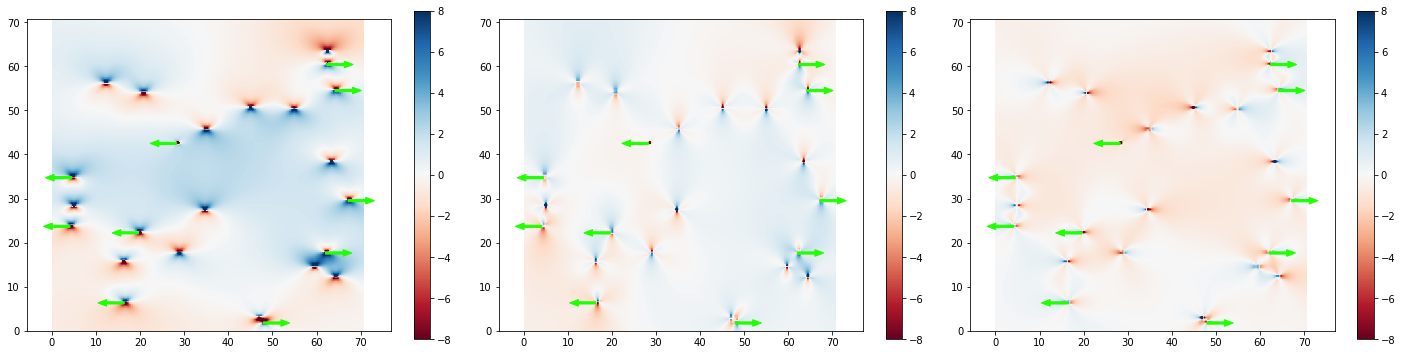

Relaxed dislocation configuration

Virtual dynamic tensile test with loading rate  1.0 /s
Performing 100000 iterations with initial time step 0.005

Iteration 	| stress 	| plastic strain 		| Time step 
---------------------------------------------------------------------------------
10000 		| 4.67952 	| 5.2652037443448756e-05 	| 0.00515
20000 		| 4.72565 	| 0.00010583217043502114 	| 0.00505
30000 		| 4.69929 	| 0.00015761549766520993 	| 0.00446
40000 		| 4.69456 	| 0.0002026970004490841 	| 0.00485
50000 		| 4.83352 	| 0.0002516292315281747 	| 0.00518
60000 		| 4.70062 	| 0.00029554926709666866 	| 0.00419
70000 		| 4.68786 	| 0.00033965729467310936 	| 0.00508
80000 		| 4.67783 	| 0.00038701091399543134 	| 0.00448
90000 		| 4.691 	| 0.00043053267091446625 	| 0.00439


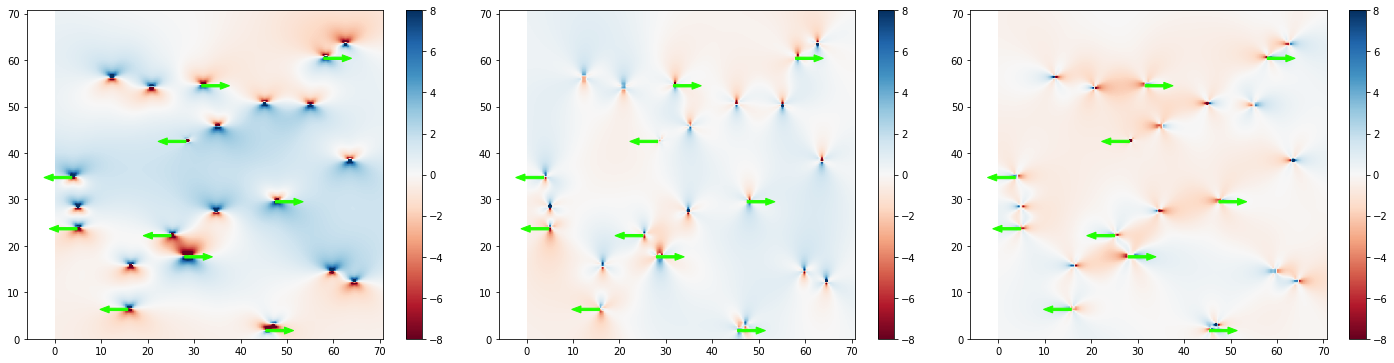

Configuration after 92469 iterations at total strain 0.000500000188846395
Time step in last iteration:  0.004388221950748829


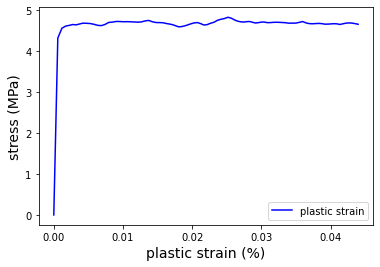


Configuration: 50 dislocations 10 mobile dislocations
box size: 70.71 micron x  70.71 micron
total dislocation density:  0.010000191803678797 /micron^2
mobile dislocation density:  0.0020000383607357594 /micron^2


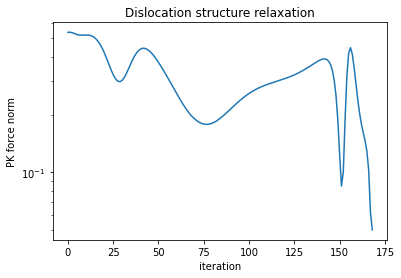

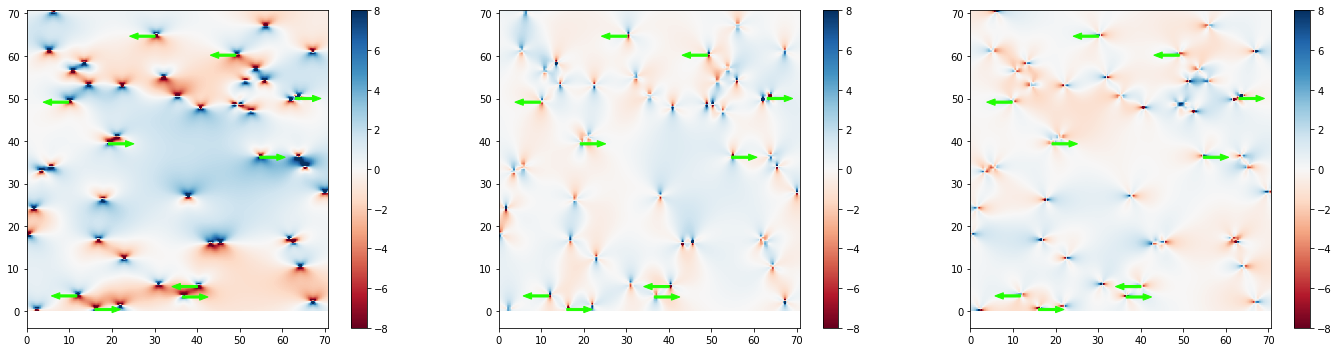

Relaxed dislocation configuration

Virtual dynamic tensile test with loading rate  1.0 /s
Performing 100000 iterations with initial time step 0.005

Iteration 	| stress 	| plastic strain 		| Time step 
---------------------------------------------------------------------------------
10000 		| 4.8273 	| 5.111234571606076e-05 	| 0.00459
20000 		| 4.96982 	| 8.336378580974444e-05 	| 0.00328
30000 		| 5.1475 	| 0.00011501386787967411 	| 0.00361
40000 		| 4.6237 	| 0.00015155917069181992 	| 0.00318
50000 		| 4.82378 	| 0.00018768889932063072 	| 0.00466
60000 		| 4.68506 	| 0.00023166539574002605 	| 0.00378
70000 		| 4.79626 	| 0.00026582926746360707 	| 0.00374
80000 		| 4.83089 	| 0.0003099721168631138 	| 0.00448
90000 		| 4.82321 	| 0.0003503612925285511 	| 0.00383
100000 		| 5.05131 	| 0.00038444359592015783 	| 0.00374


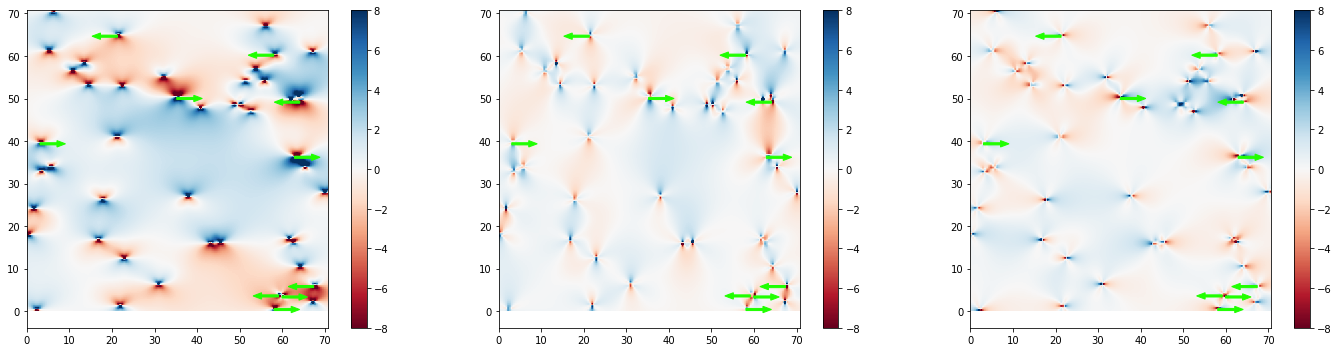

Configuration after 100000 iterations at total strain 0.00044758080815304475
Time step in last iteration:  0.0037363856812542115


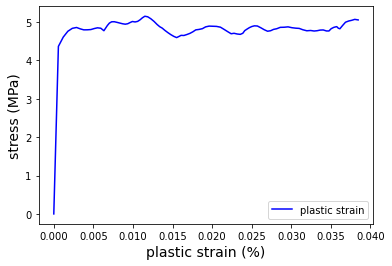


Configuration: 120 dislocations 10 mobile dislocations
box size: 70.71 micron x  70.71 micron
total dislocation density:  0.02400046032882911 /micron^2
mobile dislocation density:  0.0020000383607357594 /micron^2


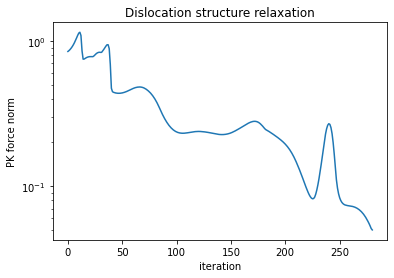

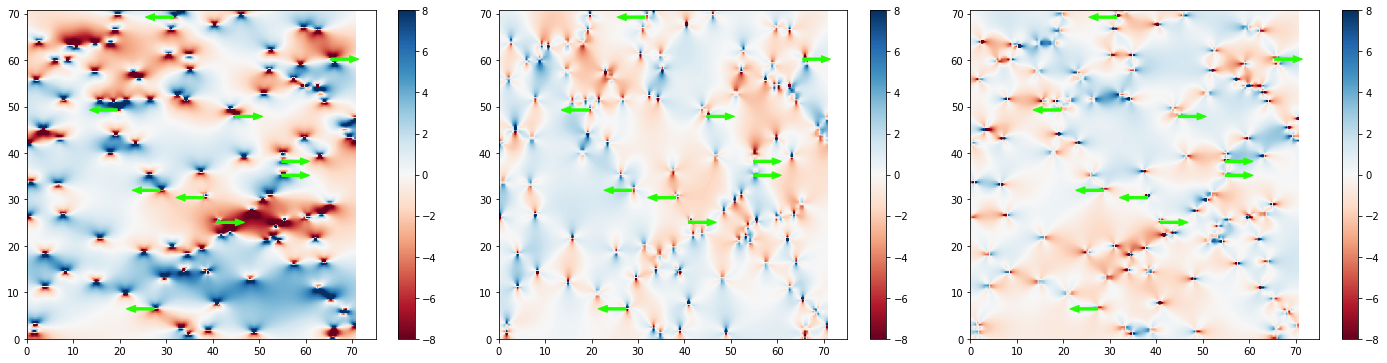

Relaxed dislocation configuration

Virtual dynamic tensile test with loading rate  1.0 /s
Performing 100000 iterations with initial time step 0.005

Iteration 	| stress 	| plastic strain 		| Time step 
---------------------------------------------------------------------------------
10000 		| 5.11409 	| 3.569534904545346e-05 	| 0.00372
20000 		| 4.86968 	| 7.385446513691533e-05 	| 0.00268
30000 		| 4.8238 	| 0.00010735109462533081 	| 0.00315
40000 		| 4.90358 	| 0.0001378712507850963 	| 0.00315
50000 		| 4.93041 	| 0.00017081238503545245 	| 0.0024
60000 		| 4.51197 	| 0.00019907211890139845 	| 0.00282
70000 		| 5.23714 	| 0.00023206563122729113 	| 0.00309
80000 		| 5.23632 	| 0.00026246235551225644 	| 0.00272
90000 		| 5.0502 	| 0.0002865392360104154 	| 0.00292
100000 		| 5.28807 	| 0.00031607624400672123 	| 0.0034


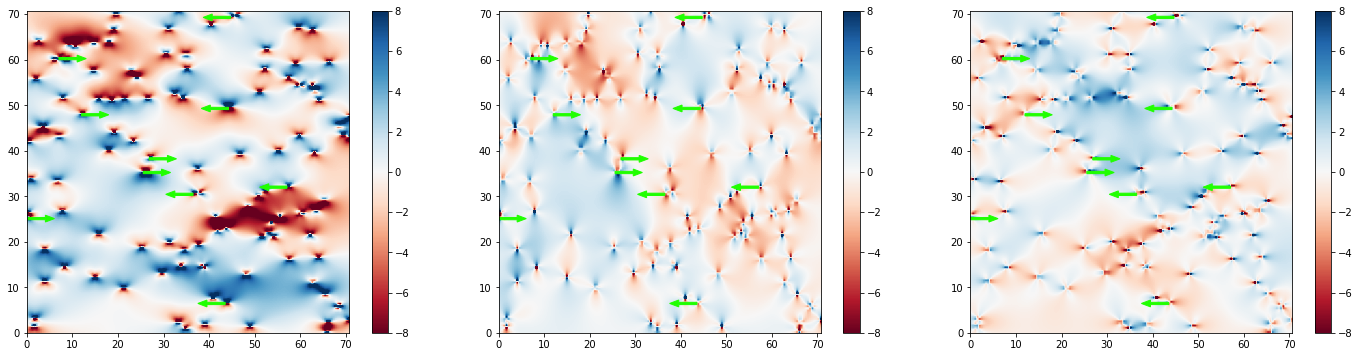

Configuration after 100000 iterations at total strain 0.00038217395971931365
Time step in last iteration:  0.003395573078040867


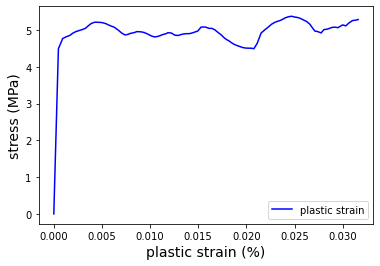

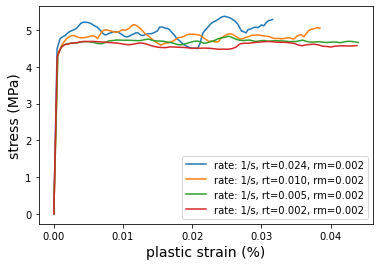

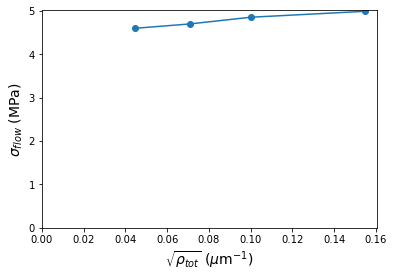

In [3]:
#box geometry
LX = 70.71             # box dimension in x-direction
LY = 70.71             # box dimension in y-direction
bc = 'pbc'            # set boundary conditions: 'fixed' or 'pbc'
#initialze random number generator
np.random.seed(110)  # seed RNG
rt_rho = []
sy = []
eps = []
sig = []
label = []
Nmob = 10
Nlist = [10, 25, 50, 120]

for Ntot in Nlist:
    #define dislocations
    dsl = Dislocations(Ntot, Nmob, spang, C, b0, 
                          LX=LY, LY=LY, bc=bc, f0=f0) 
    dsl.positions(stol=1.e-3)   # initialize positions randomly
    print('\n===============================================================')
    print('Configuration:', dsl.Ntot,'dislocations', dsl.Nmob,'mobile dislocations')
    print('box size:',dsl.lx,'micron x ',dsl.ly,'micron')
    print('total dislocation density: ',dsl.rho,'/micron^2')
    print('mobile dislocation density: ',dsl.rho_m,'/micron^2')

    dsl.relax_disl()  # relax dislocations into force equilibrium
    dsl.plot_stress()
    print('Relaxed dislocation configuration\n')
    print('Virtual dynamic tensile test with loading rate ',edot*1e6,'/s')
    print('Performing',nstep,'iterations with initial time step', dt0)
    print('\nIteration \t| stress \t| plastic strain \t\t| Time step ')
    print('---------------------------------------------------------------------------------')
    #initialize variables
    tau0 = 0.     # macro shear stress
    epl  = 0.     # plastic strain
    etot = 0.     # total strain
    sig_m = [0.]   # initialize list for stress values for postprocessing 
    epl_m = [0.]
    eps_m = [0.]
    ic = 0
    Cpl = dsl.rho_m*b0  # prefactor for Orowan law
    while etot<efin and ic<nstep:
        etot +=edot*dt
        tau0 = mu*(etot-epl)
        fsp, dt = dsl.move_disl(tau0, Nmob, moblaw, dt)
        #calculate plastic slip
        dgpl = Cpl*(np.dot(dsl.dx,dsl.bx) + np.dot(dsl.dy,dsl.by))
        epl += dgpl
        if epl>etot:
            print('Warning: check time step', ic, dgpl, tau0, epl, etot, f0)
        ic += 1
        if ic%idat==0:
            sig_m.append(tau0)
            eps_m.append(etot)
            epl_m.append(epl)
            if ic%ipl==0:
                #dsl.plot_stress()
                print(ic,'\t\t|', tau0.round(5),'\t|',epl,'\t|',dt.round(5))
    dsl.plot_stress() 
    print('Configuration after',ic,'iterations at total strain',etot)
    print('Time step in last iteration: ',dt) 
    
    epl_m = np.array(epl_m)
    sig_m = np.array(sig_m)
    eps_m = np.array(eps_m)
    plt.plot(epl_m*100,sig_m,'b',label='plastic strain')
    plt.xlabel('plastic strain (%)',fontsize=14)
    plt.ylabel('stress (MPa)',fontsize=14)
    plt.legend()
    plt.show()
    
    eps.append(epl_m)
    sig.append(sig_m)
    rt_rho.append(np.sqrt(dsl.rho))
    i0 = int(len(sig_m)*0.1)
    sy.append(np.average(sig_m[i0:]))
    label.append('rate: 1/s, rt='+format(dsl.rho,'.3f')+', rm='+format(dsl.rho_m,'.3f'))

#plot stress strain curves
for i in range(len(Nlist)-1,-1,-1):
    plt.plot(eps[i]*100,sig[i],label=label[i])
plt.xlabel('plastic strain (%)',fontsize=14)
plt.ylabel('stress (MPa)',fontsize=14)
plt.legend()
plt.show()

#plot flow stress again sqrt of total disl. density
plt.plot(rt_rho,sy,'-o')
plt.xlim(left=0.)
plt.ylim(bottom=0.)
plt.xlabel(r'$\sqrt{\rho_{tot}}$ ($\mu$m$^{-1}$)',fontsize=14)
plt.ylabel(r'$\sigma_{flow}$ (MPa)',fontsize=14)
plt.show()

It is seen that the Taylor relation is also fulfilled, but that the slope is significantly smaller than in the first case. Moreover, the flow stress for low dislocation densities is significantly higher than in the first case which possibly results from a stronger elastic interaction of the mobile dislocations due to close encounters in a relatively smaller box.